# Generate Figure 6

Import all the needed packages.

In [27]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

## 1. Single plot
With this code a plot for a single experiment and graphs corresponding to all five selection methods can be generated.

In [28]:
file = open('figure_1_struct_noise_single.pickle', 'rb')
results = pickle.load(file)
file.close()

# Set the x and y values
# Use the indexes of the input arrays as the x values
y1 = results["val_accuracy"][0]
y2 = results["val_accuracy"][1]
y3 = results["val_accuracy"][2]
y4 = results["val_accuracy"][3]
y5 = results["val_accuracy"][4]

# Create the plot
plt.plot(y1, color='blue', label='Reducible Loss')
plt.plot(y2, color='green', label='Irreducible Loss')
plt.plot(y3, color='pink', label='Loss')
plt.plot(y4, color='orange', label='Uniform Sampling')
plt.plot(y5, color='red', label='Gradient Norm')

# Add labels and title
plt.xlabel('Steps', fontsize=16)
plt.ylabel('Test Accuracy (%)', fontsize=16)
plt.title('Structured Noise', fontsize=14)

# Add legend
plt.legend()

# Color the values of the x and y axis gray
plt.tick_params(axis='x', colors='gray')
plt.tick_params(axis='y', colors='gray')

# Set the range and step size for the x and y axes using the ticks function
plt.yticks(range(60, 110, 10))
plt.ylim(60, 100, 10)
plt.xticks(range(0, 2000, 500))
plt.xlim(0, 2000, 500)

# Show the plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'figure_1_struct_noise_single.pickle'

## 2. Multiplot

With this plot the full plot for figure 6 can be generated.

In [55]:
def create_plot(result, title, axis):
    experiments = list(set(result['selection_method']))
    colors = ['pink', 'red', 'green', 'orange', 'blue']

    for idx, experiment in enumerate(experiments):

        indices = np.where(np.array(result['selection_method']) == experiment)[0]
        accuracies = np.array(result["val_accuracy"])[indices]

        accuracies_mean = accuracies.mean(axis = 0)
    
        axis.plot(accuracies_mean, color=colors[idx], label=experiment)

    # Add labels and title
    axis.set_xlabel('Steps', fontsize=18)
    axis.set_ylabel('Test Accuracy (%)', fontsize=18)
    axis.set_title(title, fontsize=20)

    # Add legend


    # Color the values of the x and y axis gray
    axis.tick_params(axis='x', colors='gray', labelsize=14)
    axis.tick_params(axis='y', colors='gray', labelsize=14)

    # Set the range and step size for the x and y axes using the ticks function
    axis.set_yticks(range(60, 110, 10))
    axis.set_ylim(60, 100, 10)
    axis.set_xticks(range(0, 2000, 500))
    axis.set_xlim(0, 1500, 500)

/tmp/ipykernel_23347/1893746280.py:31: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  axis.set_ylim(60, 100, 10)
/tmp/ipykernel_23347/1893746280.py:33: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  axis.set_xlim(0, 1500, 500)
/tmp/ipykernel_23347/836053118.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


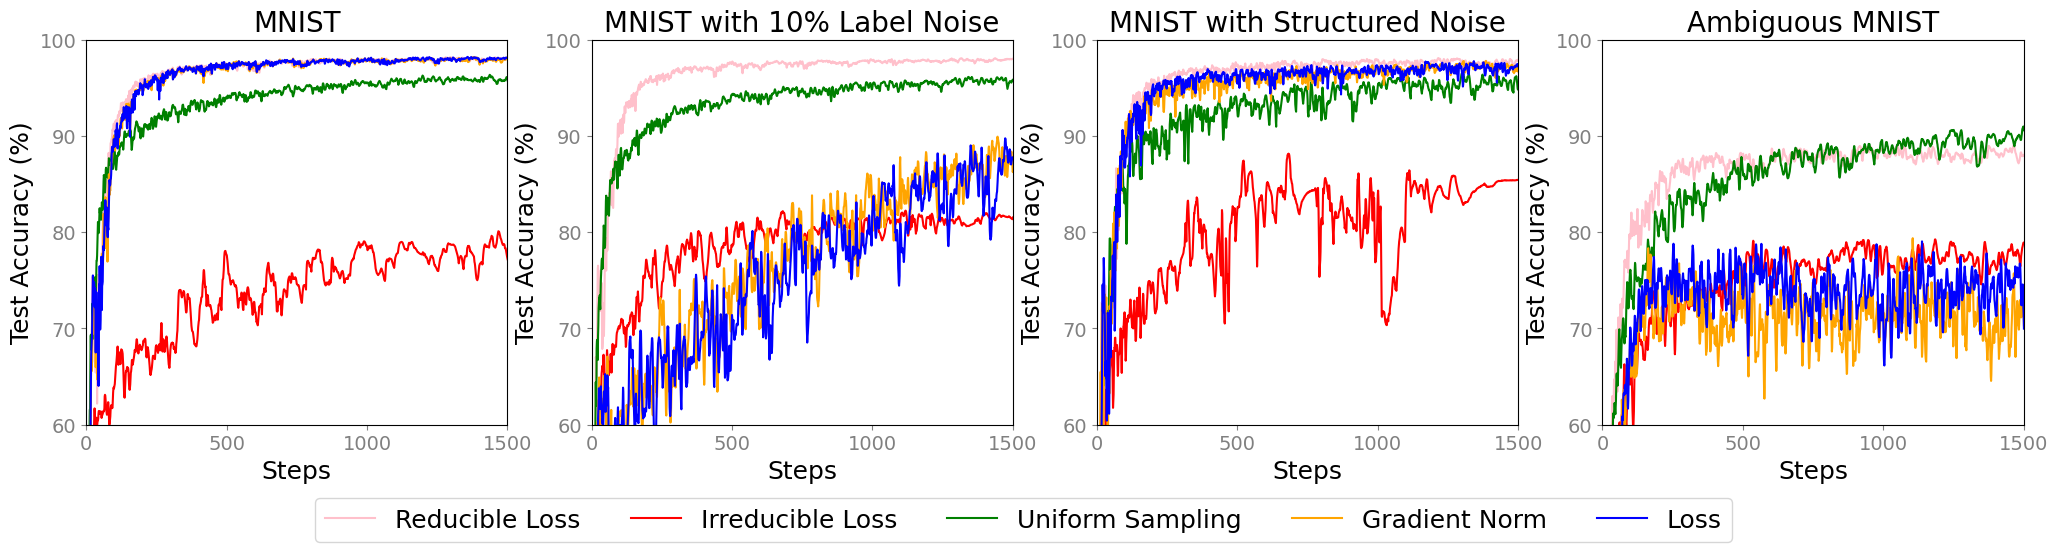

In [56]:
files = ['figure_1_no_noise.pickle',
         'figure_1_unstruct_noise.pickle',
         'figure_1_struct_noise.pickle',
         'figure_1_ambiguous_noise.pickle']

names = ['MNIST',
         'MNIST with 10% Label Noise',
         'MNIST with Structured Noise',
         'Ambiguous MNIST']

fig = plt.figure(figsize=(25, 5))
axes = fig.subplots(1, 4)
handles, labels = None, None
for idx, ax in enumerate(axes):
    
    file = open(files[idx], 'rb')
    results = pickle.load(file)
    file.close()
    
    create_plot(results, names[idx], ax)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.5, -0.15), loc='lower center', ncol=5, prop={'size': 18})
fig.show()
fig.savefig('figure_6.pdf', bbox_inches='tight')